# Galaxy Zoo

Understanding how and why we are here is one of the fundamental questions for the human race. Part of the answer to this question lies in the origins of galaxies, such as our own Milky Way. Yet questions remain about how the Milky Way (or any of the other ~100 billion galaxies in our Universe) was formed and has evolved. Galaxies come in all shapes, sizes and colors: from beautiful spirals to huge ellipticals. Understanding the distribution, location and types of galaxies as a function of shape, size, and color are critical pieces for solving this puzzle.

![Image Credit: ESA/Hubble & NASA](https://storage.googleapis.com/kaggle-competitions/kaggle/3175/media/mainimage.jpg)

With each passing day telescopes around and above the Earth capture more and more images of distant galaxies. As better and bigger telescopes continue to collect these images, the datasets begin to explode in size. In order to better understand how the different shapes (or morphologies) of galaxies relate to the physics that create them, such images need to be sorted and classified. 

Hence the Galaxy Zoo Challenge!

### Happy EDA! Feel free to fork this notebook and add your own inputs and experiment! Do drop any questions or tips for improvements in the comments, and dont forget to Upvote! For more such projects and ML in general, visit my [Github/shibinjudahpaul](https://github.com/shibinjudahpaul)

## Goal
The aim is to analyze the JPG images of galaxies to find automated metrics that reproduce the probability distributions derived from human classifications. For each galaxy, determine the probability that it belongs in a particular class. 

## Import libraries

In [2]:
import numpy as np#numerical computations of linear algebra operations
import pandas as pd#useful for working with csv file as pandas dataframe object form
from sklearn.model_selection import train_test_split#to divide our dataset into train test and validation sets
import tensorflow as tf#deep learning library
import os#to interact with the kaggle os
import random#random value genrator
import matplotlib.pyplot as plt#to show the demographics

## Unzip the training data  

In [3]:
!unzip -q /kaggle/input/galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.zip


## Read and split the data and divide it in training and testing data

In [4]:
df = pd.read_csv('/kaggle/working/training_solutions_rev1.csv')

df_train, df_test = train_test_split(df[:30000], test_size=.2)
df_train.shape, df_test.shape

((24000, 38), (6000, 38))

In [5]:
# train_test_split??
# df_train

#### Basic EDA

In [6]:
df_train.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
19428,385160,0.044457,0.955543,0.000000,0.955543,0.000000,0.0,0.000000,0.000000,0.000000,...,0.130755,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3117,147081,0.841200,0.129791,0.029008,0.000000,0.129791,0.0,0.129791,0.000000,0.129791,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
5659,183980,0.539888,0.438300,0.021812,0.000000,0.438300,0.0,0.438300,0.201501,0.236799,...,0.000000,0.201501,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.201501
5908,187574,0.864000,0.045000,0.091000,0.000000,0.045000,0.0,0.045000,0.000000,0.045000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
19329,383519,0.256156,0.743844,0.000000,0.049185,0.694659,0.0,0.694659,0.588557,0.106101,...,0.049185,0.182345,0.252496,0.153716,0.0,0.421209,0.0,0.0,0.0,0.167349


In [7]:
pd.set_option('max_columns', 200)
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,320868.712125,0.431108,0.543955,0.024937,0.107007,0.436948,0.102086,0.334862,0.217646,0.219302,0.040447,0.181579,0.178246,0.036676,0.229763,0.770237,0.167369,0.208628,0.055111,0.034622,0.013130,0.032640,0.039621,0.064112,0.041760,0.003878,0.063324,0.010612,0.033071,0.092534,0.084543,0.040569,0.015335,0.095116,0.017911,0.007559,0.007268,0.074457
std,126081.714238,0.282644,0.295461,0.036756,0.213326,0.301985,0.176818,0.248229,0.286244,0.178790,0.085909,0.193287,0.180253,0.060436,0.225450,0.225450,0.236605,0.216558,0.111460,0.100991,0.026457,0.051703,0.080209,0.089570,0.107915,0.024023,0.138882,0.038654,0.098767,0.145245,0.140915,0.101301,0.052532,0.194729,0.068831,0.037718,0.038677,0.107959
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,211606.750000,0.178114,0.283595,0.000000,0.000000,0.168954,0.000000,0.123306,0.000000,0.072190,0.000000,0.000000,0.000000,0.000000,0.066369,0.678991,0.000000,0.032171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,322551.000000,0.413832,0.562075,0.014883,0.000000,0.398782,0.000000,0.291648,0.096610,0.183213,0.000000,0.117124,0.127863,0.000000,0.149104,0.850896,0.035086,0.127034,0.000000,0.000000,0.000000,0.000000,0.000000,0.033914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,429252.000000,0.676501,0.809373,0.034034,0.085785,0.695251,0.134926,0.519616,0.335325,0.337305,0.044968,0.292806,0.284843,0.057678,0.321009,0.933631,0.274459,0.335436,0.049050,0.027619,0.024814,0.046165,0.044750,0.086372,0.031764,0.000000,0.055141,0.000000,0.000000,0.148938,0.127348,0.031891,0.000000,0.100295,0.000000,0.000000,0.000000,0.129714
max,540188.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.925311,0.803556,0.914892,0.870493,0.629493,1.000000,1.000000,0.990592,0.990016,0.849000,0.969157,0.474519,0.568809,0.771772,0.790470,0.971000,0.659130,0.938194,0.889493,0.901991,0.949733,0.877393,0.996952,0.843726,1.000000,0.975913,0.936903,0.938881,0.655156


In [8]:
print("Shape of the train set: ",df_train.shape)

print("Shape of the test set: ",df_test.shape)

Shape of the train set:  (24000, 38)
Shape of the test set:  (6000, 38)


#### Unzipping train and test images

In [9]:
!unzip -q /kaggle/input/galaxy-zoo-the-galaxy-challenge/images_training_rev1.zip
!unzip -q /kaggle/input/galaxy-zoo-the-galaxy-challenge/images_test_rev1.zip

#### EDA Images

In [10]:
trainPath = '/kaggle/working/images_training_rev1'
testPath = '/kaggle/working/images_test_rev1'

In [11]:
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample)#from the directory of images given and the number of samples as a 
#     parameter,random.sample will randomly select 5 sample images names from that folder and wil assign it to the variable
    print(random_image)
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1)
        img=tf.io.read_file(os.path.join(path,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False) 

['131064.jpg', '209140.jpg', '249000.jpg', '344292.jpg', '122158.jpg']


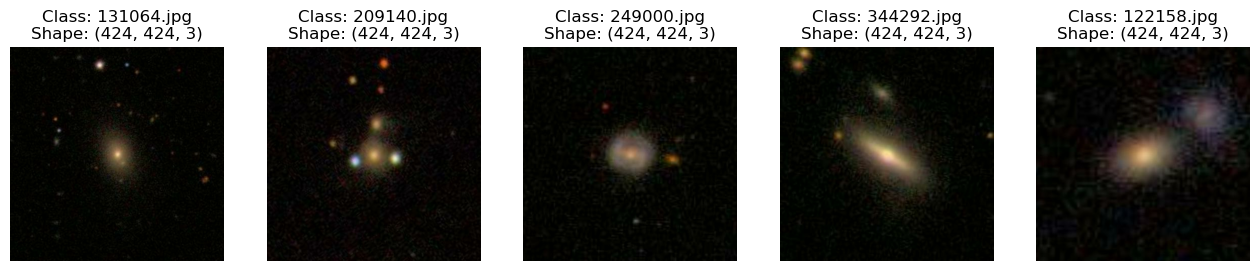

In [12]:
plot_random_galaxy(trainPath)

['163727.jpg', '274533.jpg', '551953.jpg', '571396.jpg', '720661.jpg']


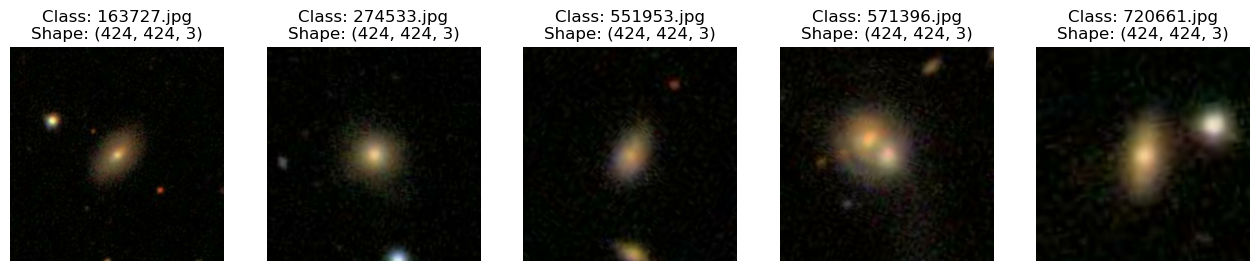

In [13]:
plot_random_galaxy(testPath)

**We can see a mix of elliptical and spiral galaxies in both train and test datasets.**

#### Read images in reference to the csv file, Resize and split them into train and test data(X,y) 

In [14]:
# df_train.values??##returns data in rows,so[[1],[2]...[n]]

In [15]:

from skimage.transform import resize
from tqdm import tqdm # progress with the model
import matplotlib.pyplot as plt
%matplotlib inline
          

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)#reading the image
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]#cropping the image
    x = resize(x, shape)#we want all images to be in 64*64 dimension
    x = x/255.#using regularization on images so no image wth larger magnitude dominate the learning process.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('/kaggle/working/images_training_rev1/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)

100%|██████████| 6000/6000 [00:57<00:00, 104.82it/s]


In [16]:
X_train.shape

(24000, 64, 64, 3)

In [17]:
df_train.values[0].shape

(38,)

#### Build a Deep learning Model using Mirrored Strategy 

In [23]:
from keras.models import Sequential#to build simple deep learning architecture
from keras.layers import Conv2D, MaxPooling2D#for building cnn and adding maxpool layers
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D#for adding non-linearity,to make our model better generalize(for randomly dropping out the nodes to be trained so,improves the model learning efficiency through out all nodes equally),after training has been done;we need to flatten the results into single array to feed it to dense layers,
from keras import backend as K
#batchnormalization and globalmaxpooling
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#to use two GPUs in parallel
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    model = Sequential()
    model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
    model.add(Conv2D(256, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Conv2D(256, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Conv2D(128, (3, 3)))
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(GlobalMaxPooling2D())


    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(37))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy',root_mean_squared_error])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 512)       14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 256)       1179904   
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 60, 60, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 256)       5

#### begin training

In [24]:
batch_size = 32
with strategy.scope():
    model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test),use_multiprocessing=True)

Epoch 1/20
750/750 [==============================] - 81s 75ms/step - loss: 0.3066 - accuracy: 0.5418 - root_mean_squared_error: 0.1651 - val_loss: 1.0887 - val_accuracy: 0.5898 - val_root_mean_squared_error: 0.2401
Epoch 2/20
750/750 [==============================] - 52s 70ms/step - loss: 0.2755 - accuracy: 0.6184 - root_mean_squared_error: 0.1383 - val_loss: 1.0289 - val_accuracy: 0.0895 - val_root_mean_squared_error: 0.2455
Epoch 3/20
750/750 [==============================] - 52s 70ms/step - loss: 0.2665 - accuracy: 0.6622 - root_mean_squared_error: 0.1292 - val_loss: 0.5136 - val_accuracy: 0.0895 - val_root_mean_squared_error: 0.2237
Epoch 4/20
750/750 [==============================] - 52s 69ms/step - loss: 0.2615 - accuracy: 0.6809 - root_mean_squared_error: 0.1240 - val_loss: 1.0396 - val_accuracy: 0.5898 - val_root_mean_squared_error: 0.2144
Epoch 5/20
750/750 [==============================] - 52s 70ms/step - loss: 0.2583 - accuracy: 0.6978 - root_mean_squared_error: 0.1202 

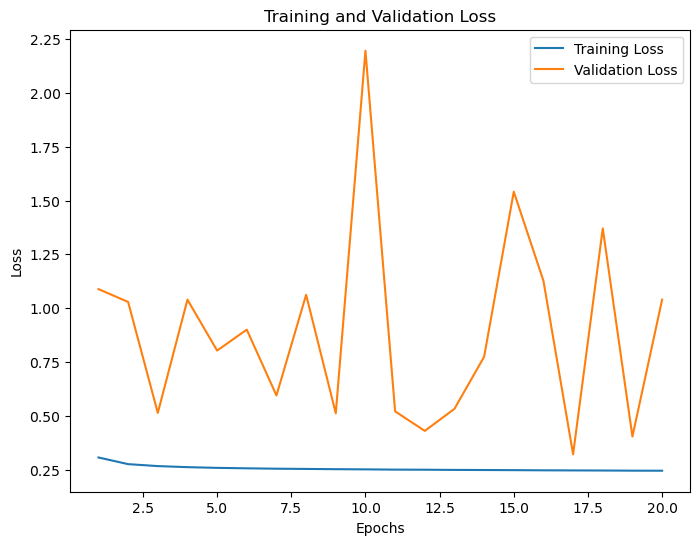

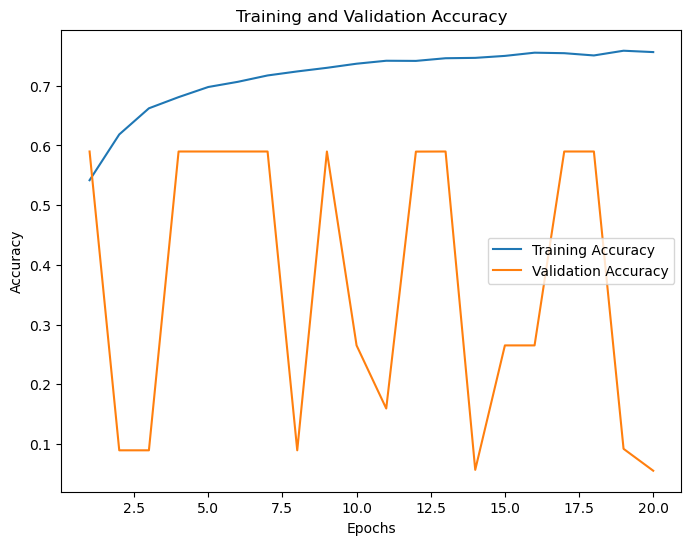

In [25]:

train_loss = model.history.history['loss']
train_acc = model.history.history['accuracy']
val_loss = model.history.history['val_loss']
val_acc = model.history.history['val_accuracy']
num_epochs=20
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), train_acc, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# model.save('/kaggle/working/model.h5')
# Retrieve the training history

In [ ]:
# batch_size = 64
# with strategy.scope():
#     model.fit(X_train, y_train, epochs=0, validation_data=(X_test, y_test),use_multiprocessing=True)

In [ ]:
# batch_size = 32
# with strategy.scope():
#     model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test),use_multiprocessing=True)

In [25]:
# model.save('/kaggle/working/model-15-epochs-saturday.h5')
# # Retrieve the training history
# train_loss = model.history.history['loss']
# train_acc = model.history.history['accuracy']
# val_loss = model.history.history['val_loss']
# val_acc = model.history.history['val_accuracy']
# num_epochs=10
# # Plot the training and validation loss
# plt.figure(figsize=(4,4))
# plt.plot(range(1, num_epochs+1), train_loss, label='Training Loss')
# plt.plot(range(1, num_epochs+1), val_loss, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

# # Plot the training and validation accuracy
# plt.figure(figsize=(4, 4))
# plt.plot(range(1, num_epochs+1), train_acc, label='Training Accuracy')
# plt.plot(range(1, num_epochs+1), val_acc, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()

In [32]:
# model = tf.keras.models.load_model('/kaggle/input/model123/Model_1_15_epochs.h5')

In [33]:
# model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy',root_mean_squared_error])


In [ ]:
# batch_size = 32
# # strategy1 = tf.distribute.MirroredStrategy()

# # with strategy1.scope():
# model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test),use_multiprocessing=True)

In [ ]:
# train_loss = model.history.history['loss']
# train_acc = model.history.history['accuracy']
# val_loss = model.history.history['val_loss']
# val_acc = model.history.history['val_accuracy']
# num_epochs=5
# # Plot the training and validation loss
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, num_epochs+1), train_loss, label='Training Loss')
# plt.plot(range(1, num_epochs+1), val_loss, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()

# # Plot the training and validation accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, num_epochs+1), train_acc, label='Training Accuracy')
# plt.plot(range(1, num_epochs+1), val_acc, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()
# plt.show()

#### After 20 epochs,

* **Loss:** 0.2476
* **Accuracy:** 0.7494
* **Root Mean Squared Error:** 0.1066
* **Validation loss:** 0.2443
* **Validation Accuracy:** 0.7567
* **Validation Root Mean Squared Error:** 0.1035

In [18]:
# import tensorflow as tf

# # Define the custom metric function
# def root_mean_squared_error(y_true, y_pred):
#     return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# # Register the custom metric function
# tf.keras.utils.get_custom_objects()['root_mean_squared_error'] = root_mean_squared_error

# # Load the model
# model = tf.keras.models.load_model('/kaggle/input/model123/Model_1_15_epochs.h5')


#### Generate predictions on test data

Choosing only 1000 images, as more will crash kaggle due to memory limits

In [26]:
# batch_size = 32
# # with strategy.scope():a
# model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test),use_multiprocessing=True)

In [1]:
import os
from tqdm import tqdm
batch_size = 1
def test_image_generator(ids, shape=IMG_SHAPE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
    x_batch = []
    for i in ids:
        x = get_image('/kaggle/working/images_test_rev1/'+i, x1, y1, shape=IMG_SHAPE, crop_size=CROP_SIZE)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch


val_files = os.listdir('/kaggle/working/images_test_rev1/')
val_files = val_files[0:2500]
val_predictions = []
N_val = len(val_files)
for i in tqdm(np.arange(0, N_val, batch_size)):
    if i+batch_size > N_val:
        upper = N_val
    else:
        upper = i+batch_size
    X = test_image_generator(val_files[i:upper])
    y_pred = model.predict(X, verbose=0)
    val_predictions.append(y_pred)
val_predictions = np.array(val_predictions)
Y_pred = np.vstack(val_predictions)
ids = np.array([v.split('.')[0] for v in val_files]).reshape(len(val_files),1)
submission_df = pd.DataFrame(np.hstack((ids, Y_pred)), columns=df.columns)
submission_df = submission_df.sort_values(by=['GalaxyID'])
submission_df.to_csv('sample_submission.csv', index=False)

NameError: name 'IMG_SHAPE' is not defined

In [ ]:
# yhat

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# precision = precision_score(yhat, Y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 score: {f1:.2f}")

In [31]:
submission_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
322,101491,0.00065992936,0.9985569,0.00022116826,0.0034568284,0.9919442,0.06767276,0.7956949,0.2412074,0.28428936,0.004514702,0.05820634,0.33044323,0.004463529,0.99978,0.00024234349,0.00028773167,0.0013301445,6.295562e-06,1.0717758e-05,1.8831493e-05,0.001276076,0.015860194,0.13581368,0.98047376,4.0301188e-07,0.0003968891,1.8569023e-06,4.990927e-06,0.00017113889,0.0023758938,0.15561707,0.008046935,0.07764784,5.89914e-06,2.9998785e-07,1.3770658e-07,0.00024881607
344,102138,0.00078197435,0.99834156,0.00019996027,0.0017573049,0.9929311,0.054476265,0.83390504,0.22137567,0.32314816,0.0042708353,0.059927955,0.33058426,0.00444091,0.9998211,0.00019890623,0.00031434355,0.0015049768,3.209543e-06,8.419772e-06,1.4834534e-05,0.0011055336,0.013329625,0.1462407,0.98129576,2.3999576e-07,0.00023322922,9.231489e-07,2.2619522e-06,0.00017769226,0.0021063967,0.11905003,0.0076576495,0.059748534,5.0806543e-06,2.0420906e-07,1.1018439e-07,0.00024906622
2372,102195,0.0009706106,0.997985,0.00022574369,0.0016696563,0.9919946,0.05066258,0.83407784,0.20537296,0.33774713,0.004118825,0.059697296,0.33283865,0.00466354,0.9998016,0.00022231671,0.0003972565,0.0017111837,3.2130465e-06,9.501815e-06,1.6969701e-05,0.0011400627,0.012788682,0.15206873,0.9800286,2.61565e-07,0.00023813632,9.769672e-07,2.2322465e-06,0.00019702414,0.0021057522,0.106615424,0.0077252854,0.05332076,5.330728e-06,2.1176906e-07,1.2626414e-07,0.00027721204
1008,102501,0.00066054345,0.99855405,0.00021035588,0.0033977197,0.9918724,0.06042508,0.8009792,0.21250905,0.30442563,0.004315509,0.05332644,0.3197269,0.004177421,0.99981695,0.0002030979,0.00028144955,0.0013646225,6.212101e-06,8.434745e-06,1.6271484e-05,0.001149755,0.015309776,0.1416803,0.98135924,3.43881e-07,0.00037928438,1.6664801e-06,4.493943e-06,0.00014382543,0.0019974483,0.14111286,0.007262252,0.065512076,4.5609477e-06,2.1927266e-07,1.0674916e-07,0.00022387823
1687,102816,0.0036201319,0.99339265,0.00042193735,0.0009875402,0.9840777,0.028268445,0.8452781,0.10151757,0.47852597,0.0036316446,0.051527556,0.3121113,0.005857692,0.9997236,0.0003250377,0.0013336703,0.004279771,3.0085555e-06,1.2747124e-05,2.7545382e-05,0.0012321133,0.011013301,0.20531096,0.9708501,2.978711e-07,0.0002084406,9.541938e-07,1.394568e-06,0.00026882146,0.0016320973,0.045933064,0.0067040888,0.019493885,4.8358925e-06,1.6127913e-07,1.9213985e-07,0.0004548463


#### Check the predictions

In [32]:
submission_df[:10]

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
322,101491,0.00065992936,0.9985569,0.00022116826,0.0034568284,0.9919442,0.06767276,0.7956949,0.2412074,0.28428936,0.004514702,0.05820634,0.33044323,0.004463529,0.99978,0.00024234349,0.00028773167,0.0013301445,6.295562e-06,1.0717758e-05,1.8831493e-05,0.001276076,0.015860194,0.13581368,0.98047376,4.0301188e-07,0.0003968891,1.8569023e-06,4.990927e-06,0.00017113889,0.0023758938,0.15561707,0.008046935,0.07764784,5.89914e-06,2.9998785e-07,1.3770658e-07,0.00024881607
344,102138,0.00078197435,0.99834156,0.00019996027,0.0017573049,0.9929311,0.054476265,0.83390504,0.22137567,0.32314816,0.0042708353,0.059927955,0.33058426,0.00444091,0.9998211,0.00019890623,0.00031434355,0.0015049768,3.209543e-06,8.419772e-06,1.4834534e-05,0.0011055336,0.013329625,0.1462407,0.98129576,2.3999576e-07,0.00023322922,9.231489e-07,2.2619522e-06,0.00017769226,0.0021063967,0.11905003,0.0076576495,0.059748534,5.0806543e-06,2.0420906e-07,1.1018439e-07,0.00024906622
2372,102195,0.0009706106,0.997985,0.00022574369,0.0016696563,0.9919946,0.05066258,0.83407784,0.20537296,0.33774713,0.004118825,0.059697296,0.33283865,0.00466354,0.9998016,0.00022231671,0.0003972565,0.0017111837,3.2130465e-06,9.501815e-06,1.6969701e-05,0.0011400627,0.012788682,0.15206873,0.9800286,2.61565e-07,0.00023813632,9.769672e-07,2.2322465e-06,0.00019702414,0.0021057522,0.106615424,0.0077252854,0.05332076,5.330728e-06,2.1176906e-07,1.2626414e-07,0.00027721204
1008,102501,0.00066054345,0.99855405,0.00021035588,0.0033977197,0.9918724,0.06042508,0.8009792,0.21250905,0.30442563,0.004315509,0.05332644,0.3197269,0.004177421,0.99981695,0.0002030979,0.00028144955,0.0013646225,6.212101e-06,8.434745e-06,1.6271484e-05,0.001149755,0.015309776,0.1416803,0.98135924,3.43881e-07,0.00037928438,1.6664801e-06,4.493943e-06,0.00014382543,0.0019974483,0.14111286,0.007262252,0.065512076,4.5609477e-06,2.1927266e-07,1.0674916e-07,0.00022387823
1687,102816,0.0036201319,0.99339265,0.00042193735,0.0009875402,0.9840777,0.028268445,0.8452781,0.10151757,0.47852597,0.0036316446,0.051527556,0.3121113,0.005857692,0.9997236,0.0003250377,0.0013336703,0.004279771,3.0085555e-06,1.2747124e-05,2.7545382e-05,0.0012321133,0.011013301,0.20531096,0.9708501,2.978711e-07,0.0002084406,9.541938e-07,1.394568e-06,0.00026882146,0.0016320973,0.045933064,0.0067040888,0.019493885,4.8358925e-06,1.6127913e-07,1.9213985e-07,0.0004548463
1325,103489,0.00088354497,0.9981521,0.00021777998,0.001936175,0.9920512,0.05449066,0.82603186,0.22004758,0.32256368,0.0038311547,0.05971091,0.34599516,0.0047385544,0.9997917,0.00023237841,0.00037530923,0.0015376171,3.4461154e-06,1.0879055e-05,1.7760012e-05,0.0011460094,0.012335699,0.14562215,0.98031723,2.824518e-07,0.00026373068,1.0723204e-06,2.5335798e-06,0.00020235158,0.002233121,0.11453113,0.007886296,0.059833363,5.551676e-06,2.3276235e-07,1.2915613e-07,0.00027469706
253,103838,0.0006948969,0.99849963,0.00020869198,0.0028394728,0.99225664,0.06245402,0.8080701,0.23217194,0.2983723,0.0040807496,0.05724768,0.33928543,0.004509848,0.9997992,0.00022252537,0.00029625266,0.001353249,4.975098e-06,1.0233634e-05,1.724594e-05,0.0011742417,0.0140184285,0.13824071,0.9812166,3.2868914e-07,0.00034042785,1.4431748e-06,3.7753532e-06,0.00017198922,0.002225999,0.13961612,0.0077396785,0.07018683,5.3025624e-06,2.4710238e-07,1.2049438e-07,0.00024304878
23,104058,0.0009119962,0.99810094,0.00021149458,0.001692238,0.9922389,0.052750174,0.83042765,0.21213369,0.32789657,0.0037800593,0.05924532,0.34156197,0.0046392647,0.9998035,0.00021997854,0.0003734535,0.0015912865,3.081276e-06,9.936923e-06,1.6734775e-05,0.0011090962,0.0120629305,0.1472758,0.9807021,2.488066e-07,0.00023725584,9.3765055e-07,2.1531587e-

#### Make a dataframe with only GalaxyID and Predicted class

In [33]:
labels = submission_df.columns

In [34]:
labels[1:]

Index(['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
       'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
       'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
       'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
       'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [35]:


pairs = list(zip(labels[1:], range(len(labels[1:]))))

labels_dict = dict(pairs)

In [36]:
labels_dict

{'Class1.1': 0,
 'Class1.2': 1,
 'Class1.3': 2,
 'Class2.1': 3,
 'Class2.2': 4,
 'Class3.1': 5,
 'Class3.2': 6,
 'Class4.1': 7,
 'Class4.2': 8,
 'Class5.1': 9,
 'Class5.2': 10,
 'Class5.3': 11,
 'Class5.4': 12,
 'Class6.1': 13,
 'Class6.2': 14,
 'Class7.1': 15,
 'Class7.2': 16,
 'Class7.3': 17,
 'Class8.1': 18,
 'Class8.2': 19,
 'Class8.3': 20,
 'Class8.4': 21,
 'Class8.5': 22,
 'Class8.6': 23,
 'Class8.7': 24,
 'Class9.1': 25,
 'Class9.2': 26,
 'Class9.3': 27,
 'Class10.1': 28,
 'Class10.2': 29,
 'Class10.3': 30,
 'Class11.1': 31,
 'Class11.2': 32,
 'Class11.3': 33,
 'Class11.4': 34,
 'Class11.5': 35,
 'Class11.6': 36}

In [37]:
sub_df = submission_df.copy()

sub_df['GalaxyID'] = sub_df['GalaxyID'].astype('int')
sub_df.loc[:, sub_df.columns != 'GalaxyID']=sub_df.loc[:, sub_df.columns != 'GalaxyID'].astype('float')
sub_labels = sub_df.loc[:, sub_df.columns != 'GalaxyID'].idxmax(axis=1)#finds the max value in each row of predictions

In [38]:
sub_labels

322     Class6.1
344     Class6.1
2372    Class6.1
1008    Class6.1
1687    Class6.1
          ...   
2393    Class6.1
1427    Class6.1
50      Class6.1
1033    Class6.1
1710    Class6.1
Length: 2500, dtype: object

In [39]:
sub_labels.describe()

count         2500
unique           1
top       Class6.1
freq          2500
dtype: object

In [40]:
labels_dict

{'Class1.1': 0,
 'Class1.2': 1,
 'Class1.3': 2,
 'Class2.1': 3,
 'Class2.2': 4,
 'Class3.1': 5,
 'Class3.2': 6,
 'Class4.1': 7,
 'Class4.2': 8,
 'Class5.1': 9,
 'Class5.2': 10,
 'Class5.3': 11,
 'Class5.4': 12,
 'Class6.1': 13,
 'Class6.2': 14,
 'Class7.1': 15,
 'Class7.2': 16,
 'Class7.3': 17,
 'Class8.1': 18,
 'Class8.2': 19,
 'Class8.3': 20,
 'Class8.4': 21,
 'Class8.5': 22,
 'Class8.6': 23,
 'Class8.7': 24,
 'Class9.1': 25,
 'Class9.2': 26,
 'Class9.3': 27,
 'Class10.1': 28,
 'Class10.2': 29,
 'Class10.3': 30,
 'Class11.1': 31,
 'Class11.2': 32,
 'Class11.3': 33,
 'Class11.4': 34,
 'Class11.5': 35,
 'Class11.6': 36}

In [41]:
pred_class = [labels_dict[label] for label in sub_labels]

In [42]:
sub_df['Pred_class'] = pred_class

In [43]:
sub_df

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,Pred_class
322,101491,0.000660,0.998557,0.000221,0.003457,0.991944,0.067673,0.795695,0.241207,0.284289,0.004515,0.058206,0.330443,0.004464,0.999780,0.000242,0.000288,0.001330,0.000006,0.000011,0.000019,0.001276,0.015860,0.135814,0.980474,4.030119e-07,0.000397,1.856902e-06,0.000005,0.000171,0.002376,0.155617,0.008047,0.077648,0.000006,2.999879e-07,1.377066e-07,0.000249,13
344,102138,0.000782,0.998342,0.000200,0.001757,0.992931,0.054476,0.833905,0.221376,0.323148,0.004271,0.059928,0.330584,0.004441,0.999821,0.000199,0.000314,0.001505,0.000003,0.000008,0.000015,0.001106,0.013330,0.146241,0.981296,2.399958e-07,0.000233,9.231489e-07,0.000002,0.000178,0.002106,0.119050,0.007658,0.059749,0.000005,2.042091e-07,1.101844e-07,0.000249,13
2372,102195,0.000971,0.997985,0.000226,0.001670,0.991995,0.050663,0.834078,0.205373,0.337747,0.004119,0.059697,0.332839,0.004664,0.999802,0.000222,0.000397,0.001711,0.000003,0.000010,0.000017,0.001140,0.012789,0.152069,0.980029,2.615650e-07,0.000238,9.769672e-07,0.000002,0.000197,0.002106,0.106615,0.007725,0.053321,0.000005,2.117691e-07,1.262641e-07,0.000277,13
1008,102501,0.000661,0.998554,0.000210,0.003398,0.991872,0.060425,0.800979,0.212509,0.304426,0.004316,0.053326,0.319727,0.004177,0.999817,0.000203,0.000281,0.001365,0.000006,0.000008,0.000016,0.001150,0.015310,0.141680,0.981359,3.438810e-07,0.000379,1.666480e-06,0.000004,0.000144,0.001997,0.141113,0.007262,0.065512,0.000005,2.192727e-07,1.067492e-07,0.000224,13
1687,102816,0.003620,0.993393,0.000422,0.000988,0.984078,0.028268,0.845278,0.101518,0.478526,0.003632,0.051528,0.312111,0.005858,0.999724,0.000325,0.001334,0.004280,0.000003,0.000013,0.000028,0.001232,0.011013,0.205311,0.970850,2.978711e-07,0.000208,9.541938e-07,0.000001,0.000269,0.001632,0.045933,0.006704,0.019494,0.000005,1.612791e-07,1.921399e-07,0.000455,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,998461,0.001691,0.996639,0.000365,0.002481,0.987151,0.042631,0.818074,0.143281,0.398238,0.004884,0.053649,0.304751,0.005119,0.999760,0.000276,0.000705,0.002849,0.000007,0.000011,0.000025,0.001339,0.015434,0.178185,0.976012,4.772384e-07,0.000380,1.968657e-06,0.000004,0.000207,0.001896,0.087878,0.007696,0.036645,0.000006,2.551802e-07,1.869511e-07,0.000356,13
1427,998906,0.000726,0.998422,0.000240,0.004251,0.990823,0.059802,0.792013,0.200929,0.305005,0.004664,0.051900,0.313062,0.004312,0.999798,0.000225,0.000313,0.001510,0.000009,0.000009,0.000019,0.001233,0.016605,0.146215,0.980148,4.488339e-07,0.000478,2.261614e-06,0.000006,0.000146,0.001998,0.140564,0.007332,0.062773,0.000005,2.510478e-07,1.292857e-07,0.000236,13
50,999174,0.000731,0.998439,0.000203,0.002163,0.992746,0.059617,0.822885,0.234820,0.306971,0.004272,0.060349,0.336057,0.004470,0.999807,0.000214,0.000304,0.001392,0.000004,0.000010,0.000016,0.001160,0.013810,0.141133,0.981232,2.847369e-07,0.000274,1.124213e-06,0.000003,0.000182,0.002255,0.131699,0.007963,0.067934,0.000006,2.403969e-07,1.194532e-07,0.000251,13
1033,999487,0.003479,0.993590,0.000481,0.001507,0.982538,0.031262,0.827662,0.104996,0.463892,0.003882,0.051479,0.313299,0.006088,0.999692,0.000361,0.001385,0.004431,0.000005,0.000015,0.000034,0.001342,0.011927,0.202154,0.970935,4.406542e-07,0.000299,1.528188e-06,0.000002,0.000274,0.001756,0.053023,0.007085,0.022143,0.000006,2.189509e-07,2.359100e-07,0.000472,13


In [44]:
predictions = sub_df.copy()

In [45]:
predictions = predictions.loc[:,['GalaxyID', 'Pred_class']]

In [46]:
predictions

,GalaxyID,Pred_class
322,101491,13
344,102138,13
2372,102195,13
1008,102501,13
1687,102816,13
...,...,...
2393,998461,13
1427,998906,13
50,999174,13
1033,999487,13


## Thanks for reading so far! Feel free to fork this notebook and add your own inputs and experiment! Happy EDA! Do drop any questions or tips for improvements in the comments, and dont forget to Upvote! For more such projects and ML in general, like computer vision, NLP and deep learning , visit my [Github/shibinjudahpaul](https://github.com/shibinjudahpaul)

In [ ]:
# 